In [5]:
# Import necessary libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Define directories for training and test data
train_directory = 'flower_dataset/train'  # Adjust the path
test_directory = 'flower_dataset/test'    # Adjust the path

# Set image size and initialize arrays
image_size = (128, 128)
train_images = []
train_labels = []
class_names = sorted(os.listdir(train_directory))

# Map class names to numeric labels
class_to_index = {class_name: index for index, class_name in enumerate(class_names)}

In [11]:
# Load training images and labels
for class_name in class_names:
    class_dir = os.path.join(train_directory, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                img = Image.open(image_path).resize(image_size)
                img_array = np.array(img) / 255.0
                train_images.append(img_array)
                train_labels.append(class_to_index[class_name])
            except Exception as e:
                print(f"Error loading {image_path}: {e}")

In [13]:
# Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

print("Training data loaded successfully.")

# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=len(class_names))

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Display training and validation set sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training data loaded successfully.
Training set size: 2204
Validation set size: 552


In [15]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

C:\Users\shikh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model architecture created successfully.")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Model architecture created successfully.


In [19]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10
)

C:\Users\shikh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - accuracy: 0.3007 - loss: 1.5240 - val_accuracy: 0.4420 - val_loss: 1.2012
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.4658 - loss: 1.2743 - val_accuracy: 0.5996 - val_loss: 1.0306
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.5376 - loss: 1.1508 - val_accuracy: 0.6232 - val_loss: 0.9557
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - accuracy: 0.5795 - loss: 1.0824 - val_accuracy: 0.6685 - val_loss: 0.8331
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - accuracy: 0.6262 - loss: 1.0004 - val_accuracy: 0.6757 - val_loss: 0.8870
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - accuracy: 0.6312 - loss: 0.9533 - val_accuracy: 0.6703 - val_loss: 0.7920
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 246ms/step - accuracy: 0.6297 - loss: 0.9244 - val_accuracy: 0.6649 - val_loss: 0.8254
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 242ms/step - accuracy: 0.6662 - loss: 0.8700 - val_accu

In [21]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6841 - loss: 0.7689
Validation loss: 0.7981, Validation accuracy: 0.6866


In [23]:
# Evaluate the model
model_loss, model_accuracy = model.evaluate(X_train, y_train)
print(f"Model loss: {model_loss:.4f}, Model accuracy: {model_accuracy:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7227 - loss: 0.7415
Model loss: 0.7308, Model accuracy: 0.7151


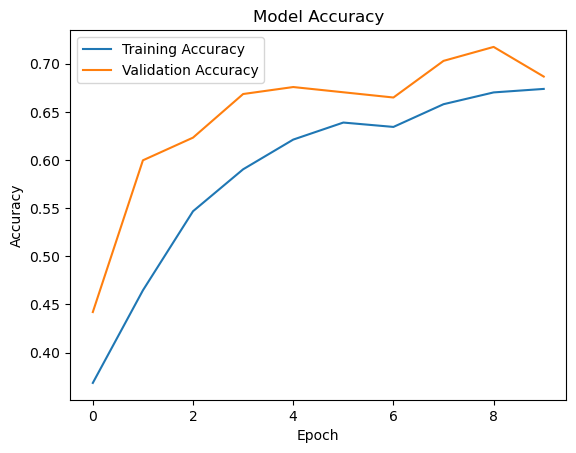

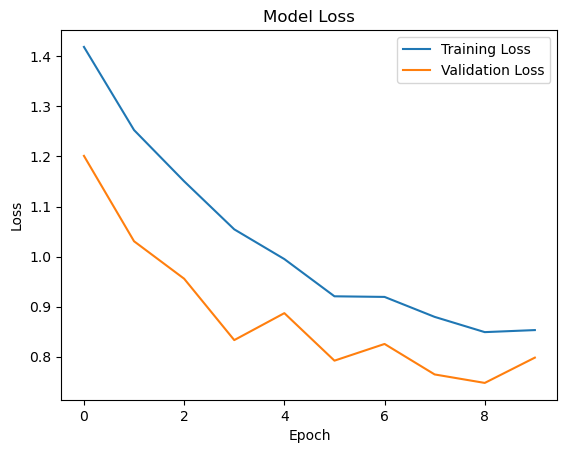

In [25]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: flower_dataset/test/Image_1.jpg - Predicted Class: sunflower


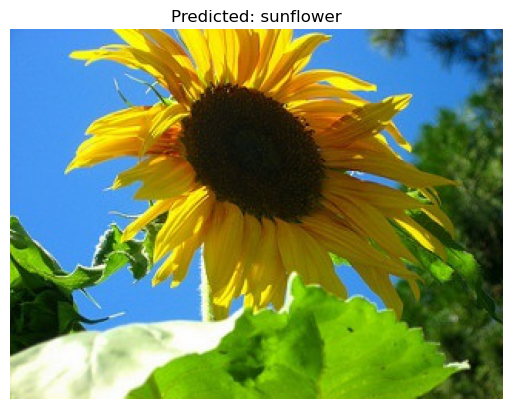

In [65]:
# Define function to predict flower species for a single image
def predict_flower_species(image_path, model, class_names):
    try:
        # Load and preprocess the image
        img = Image.open(image_path).resize(image_size)
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_label = class_names[predicted_class]

        # Display the result
        print(f"Image: {image_path} - Predicted Class: {predicted_label}")

        # Display the image
        plt.imshow(Image.open(image_path))
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error loading or processing {image_path}: {e}")

# Test the prediction function with an individual test image
image_path = 'flower_dataset/test/Image_1.jpg'
predict_flower_species(image_path, model, class_names)